# A Blood Brain Pharmacokinetic Model

## Deskripsi Masalah

Farmakokinetika adalah ilmu yang mempelajari efek dari variasi waktu pemberian obat pada tubuh. Pada permasalahan ini, diberikan model kompartemen darah-otak sebagai berikut

dan dengan penjelasan simbol-simbol sebagai berikut

|Simbol | Klasifikasi | Satuan | Deskripsi|
|-------|-------------|--------|----------|
| $x_i$ | fungsi | miligram | Banyaknya massa obat di dalam kompartemen $i$ |
| $V_i$ | konstanta | liter | Volume kompartemen $i$ |
| $c_i$ | fungsi | miligram/liter | Konsentrasi obat pada kompartemen $i$ pada sebarang saat $t$
| $k_{ij}$ | konstanta | 1/hour | Laju pergerakan obat dari kompartemen $j$ ke dalam kompartemen $i$ |
| $K$ | konstanta | 1/hour | Laju obat keluar dari tubuh |
| $R$ | konstanta | miligram/hour | Laju penyerapan obat ke dalam darah |
| $T_b$ | konstanta | hour | Waktu yang diperlukan untuk obat diserap ke dalam darah |
| $T_p$ | konstanta | hour | Waktu antar dosis |

Tujuan dari permasalahan ini adalah menentukan resep obat yang cocok berdasarkan parameter yang diberikan dalam soal. Simulasi numerik dilakukan untuk mengecek resep tersebut dengan mengecek nilai $R$, $T_p$, dan $T_b$.

## SPD menggunakan *Mass Balance Law*

Persamaan *mass balance law* dapat ditulis sebagai berikut

$$\frac{dx_i}{dt} = \text{laju masuk kompartemen}_i - \text{laju keluar kompartemen}_i$$

Menggunakan detail yang diberikan pada gambar, didapatkan hasil sebagai berikut:

$$\begin{align}
\frac{dx_1}{dt} &= -(K+k_{21})x_1 + k_{12}x_2 + d(t)\\
\frac{dx_2}{dt} &= k_{21}x_1 + k_{12}x_2\\
\end{align}$$

## Konversi SPD Massa ke SPD Konsentrasi

Dalam permasalahan ini, dapat mengetahui konsentrasi obat pada sebarang saat lebih penting ketimbang mengetahui banyak obat pada sistem. Untuk itu, perlu dilakukan perubahan pada SPD sebelumnya menjadi dalam bentuk konsentrasi. Konsentrasi didefinisikan sebagai

$$c_i = \frac{x_i}{V_i}$$

Mendiferensialkan kedua ruas terhadap $t$, didapatkan

$$\frac{dc_i}{dt} = \frac{1}{V_i}\Big(\frac{dx_i}{dt}\Big)$$

Menggunakan dua persamaan tersebut, dapat diubah SPD sebelumnya menjadi

$$\begin{align}
\frac{dc_1}{dt} &=  \frac{1}{V_1}\Big(\frac{dx_1}{dt}\Big)\\
&= -(K+k_{21})c_1 + \frac{k_{12}V_2}{V_1}c_2 + \frac{d(t)}{V_1}\\
\frac{dc_2}{dt} &=  \frac{1}{V_2}\Big(\frac{dx_2}{dt}\Big)\\
&= \frac{V_1+k_{21}}{V_2}c_1 + k_{12}c_2 \end{align}$$


## Dosis yang Direkomendasikan

Tabel berikut berisi konstanta obat yang diberikan

| $k_{21}$ | $k_{12}$ | $K$ | $V_1$ | $V_2$ | $T_b$ |
|----------|----------|-----|-------|-------|-------|
| 0.29/h | 0.31/h | 0.16/h | 6L | 0.25 L | 1h |

dan *encapsulated dosage strength* didefinisikan sebagai

$$A = RT_b $$

Selanjutnya, diberikan dua parameter berikut
1. Konsentrasi obat dalam otak perlu sedekat mungkin dengan suatu nilai konstan diantara 10mg/L dan 30mg/L. Fluktuasi tidak diperbolehkan melebihi 25% dari respon *steady-state*
2. Frekuensi pemberian obat yang rendah lebih diharapkan (setiap 12 sampai 24 jam). Jarak 9.5 jam atau kurang untuk setiap pemberian obat tidak diterima. Namun, konsumsi beberapa obat dalam sekali pemberian diperbolehkan

## Eksperimen

### Kode
Dengan menggunakan MATLAB, dibuat kode berikut

In [1]:
# konstanta yang diberikan
k21 = 0.29;
k12 = 0.31;
k   = 0.16;
v1  = 6;
v2  = 0.25;
tb  = 1;

# pengaturan
dt  = 0.001;
R   = 10.78;

# untuk kode numerik
A = [-(k+k21)   , k12*v2/v1;
      k21*v1/v2 ,     -k12];
F = [R/v1; 0];

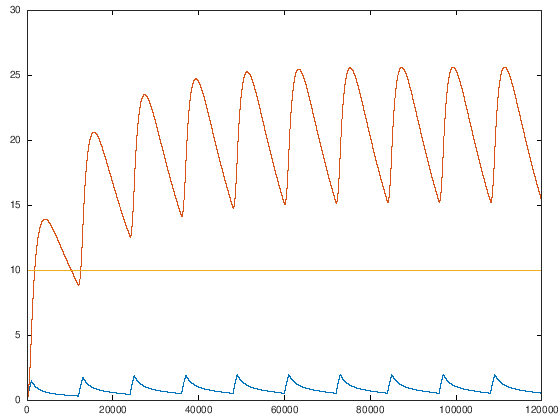

In [2]:
tp = 12;

# preallocating for faster calculation
res = zeros(10*tp*tb/dt,2);

c = [0; 0]; # konsentrasi

idx = 1;
for konsumsi_ke=1:10
    t = dt;
    
    # obat masih ada di lambung
    while t<=tb 
        c = c + dt*(A*c+F);
        res(idx,:) = c.';
        t+=dt; idx+=1;
    end
    
    # obat sudah larut ke dalam darah
    while t<=tp
        c = c + dt*(A*c);
        res(idx,:) = c.';
        t+=dt; idx+=1;
    end
end

res(:,3) = 10; # batas minimum  efektif
res(:,4) = 30; # batas maksimum efektif

plot(res);

### Pengambilan Data

Selanjutnya, dilakukan pengambilan data dengan
* variasi nilai $T_p$, dengan frekuensi 12 dan 24 jam
* variasi nilai $R$, sehingga konsentrasi *steady state* obat tidak melebih batas toksik 29mg

Untuk setiap nilai $T_p$ dan $R$, akan dicatat range konsentrasi obat, dan jika terdapat fluktuasi tajam konsentrasi di dalam otak

In [ ]:
t = 0.01;

# iterate over time period
for tp = [12, 24]
    
    toxic = false;
    R = 8;
    
    # iterate over R value
    while ~toxic
        R += 0.5;
        F = [R/v1; 0];

        # preallocating for faster calculation
        res = zeros(7*tp*tb/dt,2);

        c = [0; 0]; # konsentrasi

        idx = 8;
        for konsumsi_ke=1:8
            t = dt;
    
            # obat masih ada di lambung
            while t<=tb 
                c = c + dt*(A*c+F);
                res(idx,:) = c.';
                t+=dt; idx+=1;
            end
    
            # obat sudah larut ke dalam darah
            while t<=tp
                c = c + dt*(A*c);
                res(idx,:) = c.';
                t+=dt; idx+=1;
                
                if c(2)>30;
                    toxic = true;
                    break
                end
            end
        end
        
        if toxic
            continue
        end
        
        res = res(4*tp*tb/dt:end,:); # steady state       
        disp([tp, min(res)(2), max(res)(2), mean(res)(2), var(res)(2), R*tb])
    end
end


 |$T_p$|$\min(c)$|$\max(c)$|$E(c)$|$Var(c)$|$A$|
 |----|---------|---------|---------|--------|-----|
 | 12 | 11.6361 | 20.1800 | 16.4426 | 7.1921 | 8.5 |
 | 12 | 12.3206 | 21.3671 | 17.4098 | 8.0631 | 9 |
 | 12 | 13.0051 | 22.5542 | 18.3770 | 8.9839 | 9.5 |
 | 12 | 13.6895 | 23.7412 | 19.3442 | 9.9545 | 10 |
 | 12 | 14.374 | 24.928 | 20.311 | 10.975 | 10.5 |
 | 12 | 15.059 | 26.115 | 21.279 | 12.045 | 11 |
 | 12 | 15.743 | 27.302 | 22.246 | 13.165 | 11.5 |
 | 12 | 16.427 | 28.489 | 23.213 | 14.334 | 12 |
 | 12 | 17.112 | 29.677 | 24.180 | 15.554 | 12.5 |
 | 24 | 3.5651 | 13.6454 | 8.2743 | 10.7749 | 8.5 |
 | 24 | 3.7748 | 14.4481 | 8.7610 | 12.0798 | 9 |
 | 24 | 3.9845 | 15.2508 | 9.2477 | 13.4592 | 9.5 |
 | 24 | 4.1942 | 16.0535 | 9.7345 | 14.9133 | 10 |
 | 24 | 4.4039 | 16.8561 | 10.2212 | 16.4419 | 10.5 |
 | 24 | 4.6136 | 17.6588 | 10.7079 | 18.0451 | 11 |
 | 24 | 4.8234 | 18.4615 | 11.1946 | 19.7228 | 11.5 |
 | 24 | 5.0331 | 19.2642 | 11.6813 | 21.4751 | 12 |
 | 24 | 5.2428 | 20.0668 | 12.1681 | 23.3020 | 12.5 |
 | 24 | 5.4525 | 20.8695 | 12.6548 | 25.2035 | 13 |
 | 24 | 5.6622 | 21.6722 | 13.1415 | 27.1795 | 13.5 |
 | 24 | 5.8719 | 22.4749 | 13.6282 | 29.2301 | 14 |
 | 24 | 6.0816 | 23.2775 | 14.1150 | 31.3552 | 14.5 |
 | 24 | 6.2913 | 24.0802 | 14.6017 | 33.5549 | 15 |
 | 24 | 6.5010 | 24.8829 | 15.0884 | 35.8292 | 15.5 |
 | 24 | 6.7108 | 25.6855 | 15.5751 | 38.1780 | 16 |
 | 24 | 6.9205 | 26.4882 | 16.0619 | 40.6014 | 16.5 |
 | 24 | 7.1302 | 27.2909 | 16.5486 | 43.0994 | 17 |
 | 24 | 7.3399 | 28.0936 | 17.0353 | 45.6720 | 17.5 |

### Analisis Hasil

Terlihat dari tabel yang dihasilkan, $T_p=24$ menghasilkan solusi *steady-state* yang berada di bawah dari selang efektif obat. Keadaan ini tidak dapat diterima. Lebih lanjut, secara general variansi konsentrasi obat $T_p=24$ pada selang efektif obat, lebih besar ketimbang $T_p=12$. Hal ini menyimpulkan pemberian dosis yang cocok adalah dengan konstanta $T_p=12$.

Selanjutnya, pemberian obat dengan nilai $R$ di antara 10.5mg/h dan 11mg/h memberikan daerah konsentrasi berkisar antara 15-25mg/L. Hal ini sama dengan jarak interkuartil ($Q1-Q3$) dari daerah efektif obat :)

## Rekomendasi Dosis Obat

Berdasarkan hasil analisis, pemberian dosis $A=RT_b$ yang cocok adalah 10.5 sampai 11 miligram. Untuk kasus yang lebih ringan, pemberian dosis 8.5mg dapat dilakukan; sedangkan pada kasus yang lebih berat dapat diberikan dosis 12mg.

## Simulasi *makan 2x gegara lupa*

Berikut adalah simulasi [gatau translate dari bahasa Inggrisnya apa :(]. 

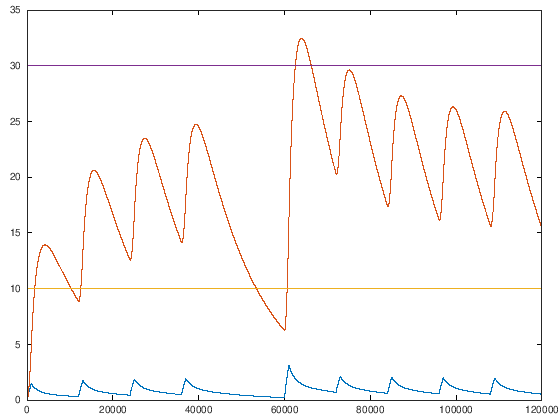

In [4]:
# pengaturan
dt  = 0.001;
R   = 10.78;

# untuk kode numerik
A = [-(k+k21)   , k12*v2/v1;
      k21*v1/v2 ,     -k12];
F = [R/v1; 0];

# preallocating for faster calculation
tp = 12;

res = zeros(10*tp*tb/dt,2);

c = [0; 0]; # konsentrasi

idx = 1;
for konsumsi_ke=1:10
    if konsumsi_ke == 5
        f = 0;
    elseif konsumsi_ke == 6
        f = 2*F;
    else
        f = F; 
    end
    
    t = dt;
    
    # obat masih ada di lambung
    while t<=tb 
        c = c + dt*(A*c+f);
        res(idx,:) = c.';
        t+=dt; idx+=1;
    end
    
    # obat sudah larut ke dalam darah
    while t<=tp
        c = c + dt*(A*c);
        res(idx,:) = c.';
        t+=dt; idx+=1;
    end
end

res(:,3) = 10; # batas minimum  efektif
res(:,4) = 30; # batas maksimum efektif

plot(res);

Grafik di atas adalah konsentrasi obat untuk single-dose sebanyak 10 kali, setiap 12 jam, dan dengan $R=10.78$. Setelah beberapa waktu, pasien lupa untuk melanjutkan minum obat [bahasanya tidak formal sekali uwu]. Hal ini menyebabkan konsentrasi obat pada otak turun di bawah batas efektif obat. Konsumsi selanjutnya, pasien tersebut menggandakan dosis obat, yang berakibat pada kenaikan tajam di grafik, dan bertahan di atas batas toksik obat untuk beberapa waktu.

Berdasarkan simulasi ini, terlihat jelas bahwa menggandakan dosis karena jadwal yang terlewat berbahaya bagi tubuh. Pilihan yang lebih baik adalah dengan melanjutkan dosis normal obat. Walau memerlukan waktu agar konsentrasi obat kembali ke selah efektif, hal ini tidak menyebabkan konsentrasi yang toksik 

## Modifikasi Nilai $T_b$

Selanjutnya, akan dilakukan simulasi dengan nilai $T_b=8$. Dengan metode eksperimen yang sama dengan sebelumnya, akan dicek apakah hal ini mengubah rekomendasi dosis obat.

In [8]:
tb  = 8;
R   = 2.45;  

A = [-(k+k21)   , k12*v2/v1;
      k21*v1/v2 ,     -k12];
F = [R/v1; 0];

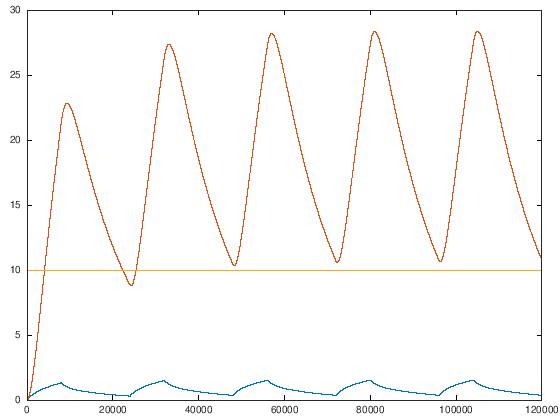

In [9]:
# preallocating for faster calculation
res = zeros(5*3*tb/dt,2);

v = [0; 0]; # besar konsentrasi di darah, dan di otak

idx = 1;
for konsumsi_ke=1:5
    t = dt;
    D = R; # obat masih ada di lambung
    while t<=tb 
        v = v + dt*(A*v+F);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
    
    D=0; # obat sudah larut ke dalam darah
    while t<=3*tb
        v = v + dt*(A*v);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
end

res(:,3) = 10; # batas minimum  efektif
res(:,4) = 30; # batas maksimum efektif

plot(res);

### Pengambilan Data